# WeatherPy
#Challenge 6

---

##  Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
# Print the list of 10 cities
for city in cities[:10]:
    print(city)

Number of cities in the list: 601
gudari
georgetown
port-aux-francais
funafuti
tazovsky
grytviken
papatowai
dazhong
greymouth
aabenraa


In [3]:
# Set the API base URL
OPENWEATHERMAP_URL = "https://api.openweathermap.org/data/2.5/weather"

# Make the API request for the first city in the list
response = requests.get(OPENWEATHERMAP_URL, params={
    "lat": lats[0],
    "lon": lngs[0],
    "appid": weather_api_key  # API key
})

# Check if the request was successful
if response.status_code != 200:
    raise Exception(f"{response.status_code}: {response.reason}, {response.content.decode()}")

# Convert response to JSON
places_data = response.json()

# Print the JSON (pretty printed)
print(json.dumps(places_data, indent=4, sort_keys=True))
    

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 19.7824,
        "lon": 83.7418
    },
    "dt": 1726174676,
    "id": 1270818,
    "main": {
        "feels_like": 298.14,
        "grnd_level": 947,
        "humidity": 94,
        "pressure": 1005,
        "sea_level": 1005,
        "temp": 297.22,
        "temp_max": 297.22,
        "temp_min": 297.22
    },
    "name": "Gud\u0101ri",
    "sys": {
        "country": "IN",
        "sunrise": 1726186331,
        "sunset": 1726230599
    },
    "timezone": 19800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 326,
        "gust": 0.98,
        "speed": 1.36
    }
}


In [4]:
# Compose the full URL with API key and lat/lon params
url = f"https://api.openweathermap.org/data/2.5/weather?lat={lats[0]}&lon={lngs[0]}&appid={weather_api_key}"


# Make the API request for the first city in the list
response = requests.get(url)

# Check if the request was successful
if response.status_code != 200:
    raise Exception(f"{response.status_code}: {response.reason}, {response.content.decode()}")

# Convert response to JSON
places_data = response.json()

# Print the JSON (pretty printed)
print(json.dumps(places_data, indent=4, sort_keys=True))
    

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 19.7824,
        "lon": 83.7418
    },
    "dt": 1726174676,
    "id": 1270818,
    "main": {
        "feels_like": 298.14,
        "grnd_level": 947,
        "humidity": 94,
        "pressure": 1005,
        "sea_level": 1005,
        "temp": 297.22,
        "temp_max": 297.22,
        "temp_min": 297.22
    },
    "name": "Gud\u0101ri",
    "sys": {
        "country": "IN",
        "sunrise": 1726186331,
        "sunset": 1726230599
    },
    "timezone": 19800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 326,
        "gust": 0.98,
        "speed": 1.36
    }
}


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?lat={lats[i]}&lon={lngs[i]}&appid={weather_api_key}"
 

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)

        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | gudari
Processing Record 2 of Set 1 | georgetown
City not found. Skipping...
Processing Record 3 of Set 1 | port-aux-francais
City not found. Skipping...
Processing Record 4 of Set 1 | funafuti
Processing Record 5 of Set 1 | tazovsky
City not found. Skipping...
Processing Record 6 of Set 1 | grytviken
City not found. Skipping...
Processing Record 7 of Set 1 | papatowai
City not found. Skipping...
Processing Record 8 of Set 1 | dazhong
Processing Record 9 of Set 1 | greymouth
Processing Record 10 of Set 1 | aabenraa
Processing Record 11 of Set 1 | berezovyy
Processing Record 12 of Set 1 | adamstown
City not found. Skipping...
Processing Record 13 of Set 1 | saint-mandrier-sur-mer
City not found. Skipping...
Processing Record 14 of Set 1 | selfoss
City not found. Skipping...
Processing Record 15 of Set 1 | tateyama
City not found. Skipping...
Processing Record 16 of Set 1 | ancud
City not found. Sk

KeyboardInterrupt: 

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          146
Lat           146
Lng           146
Max Temp      146
Humidity      146
Cloudiness    146
Wind Speed    146
Country       146
Date          146
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,xilin hot,46.3757,117.5951,279.80,58,100,5.63,MN,1726171461
1,al ghayzah,17.7198,50.7183,304.18,36,60,5.58,YE,1726171462
2,pauini,-7.8729,-65.9278,310.06,26,79,1.42,BR,1726171464
3,bethel,65.2802,-163.9204,278.71,79,42,2.22,US,1726171467
4,iqaluit,-2.6608,111.2859,294.91,98,63,0.86,ID,1726171478


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,xilin hot,46.3757,117.5951,279.80,58,100,5.63,MN,1726171461
1,al ghayzah,17.7198,50.7183,304.18,36,60,5.58,YE,1726171462
2,pauini,-7.8729,-65.9278,310.06,26,79,1.42,BR,1726171464
3,bethel,65.2802,-163.9204,278.71,79,42,2.22,US,1726171467
4,iqaluit,-2.6608,111.2859,294.91,98,63,0.86,ID,1726171478


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

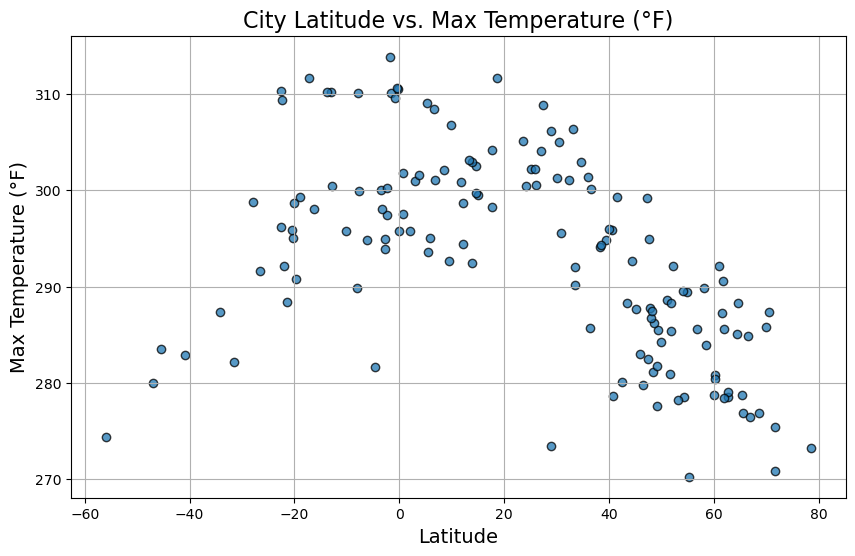

<Figure size 640x480 with 0 Axes>

In [13]:
# Build scatter plot for latitude vs. temperature
per(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="k", linewidths=1, alpha=0.75)

# Incorporate the other graph properties
# Add labels and title
plt.title("City Latitude vs. Max Temperature (°F)", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Max Temperature (°F)", fontsize=14)

# Show the plot
plt.grid(True)
plt.show()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

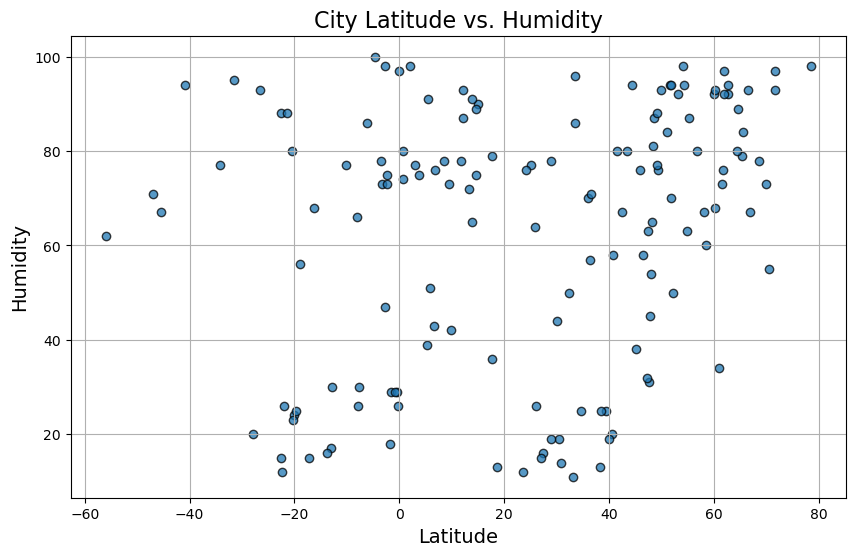

<Figure size 640x480 with 0 Axes>

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="k", linewidths=1, alpha=0.75)

# Incorporate the other graph properties
# Add labels and title
plt.title("City Latitude vs. Humidity", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Humidity", fontsize=14)

# Show the plot
plt.grid(True)
plt.show()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

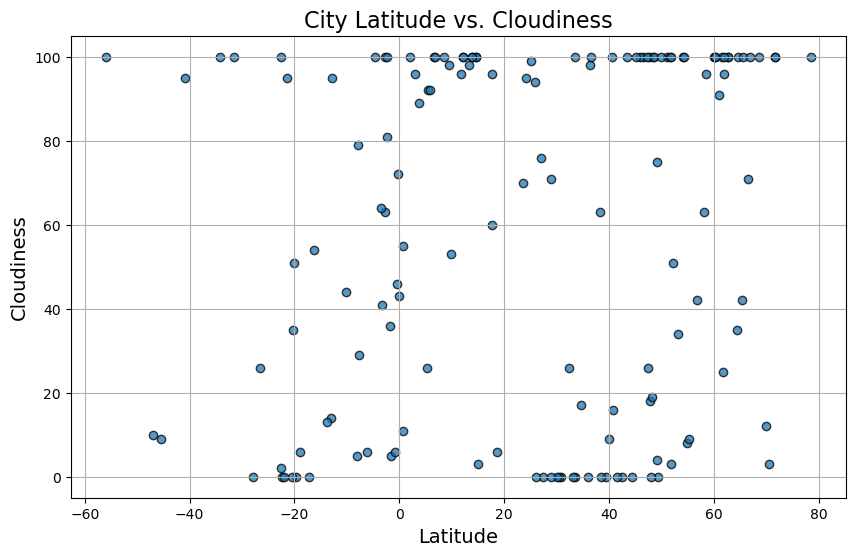

<Figure size 640x480 with 0 Axes>

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="k", linewidths=1, alpha=0.75)

# Incorporate the other graph properties
# Add labels and title
plt.title("City Latitude vs. Cloudiness", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Cloudiness", fontsize=14)

# Show the plot
plt.grid(True)
plt.show()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

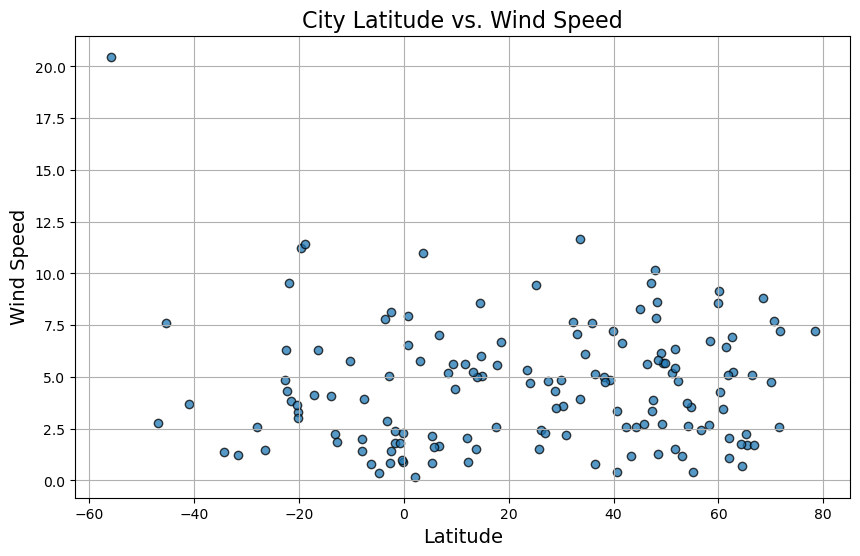

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="k", linewidths=1, alpha=0.75)

# Incorporate the other graph properties
# Add labels and title
plt.title("City Latitude vs. Wind Speed", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Wind Speed", fontsize=14)

# Show the plot
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:

#Latitude vs Temperature Linear Regression
latitudes = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]

#Perform linear regression:
# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudes, max_temps)
# Calculate the regression line values
regress_values = latitudes * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(latitudes, max_temps, edgecolors="k", linewidths=1, alpha=0.75)

# Plot the linear regression line
plt.plot(latitudes, regress_values, "r-", label=line_eq)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Max Temperature (°F)", fontsize=14)
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [ ]:
#Latitude Vs Humidity Linear Regression
plot_linear_regression(city_data_df["Lat"], city_data_df["Humidity"], 
                       "City Latitude vs. Humidity with Regression Line", 
                       "Latitude", "Humidity")

In [ ]:
#Latitude Vs Cloudiness Linear Regression
plot_linear_regression(city_data_df["Lat"], city_data_df["Cloudiness"], 
                       "City Latitude vs. Cloudiness with Regression Line", 
                       "Latitude", "Cloudiness")



In [ ]:
#Latitude Vs Windspeed Linear Regression
plot_linear_regression(city_data_df["Lat"], city_data_df["Wind Speed"], 
                       "City Latitude vs. Wind Speed with Regression Line", 
                       "Latitude", "Wind Speed")

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = pd.DataFrame()
# Display sample data
northern_hemi_df.head()

NameError: name 'northern_hemi_df' is not defined

In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kerikeri,-35.2268,173.9474,14.39,90,100,0.98,NZ,1718607765
2,margaret river,-33.9500,115.0667,15.44,67,60,3.76,AU,1718607768
5,waitangi,-43.9535,-176.5597,12.68,98,100,3.13,NZ,1718607771
7,port lincoln,-34.7333,135.8667,13.27,67,100,3.38,AU,1718607773
9,leava,-14.3000,-178.1667,28.10,85,8,8.07,WF,1718607775


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.3940754297489331


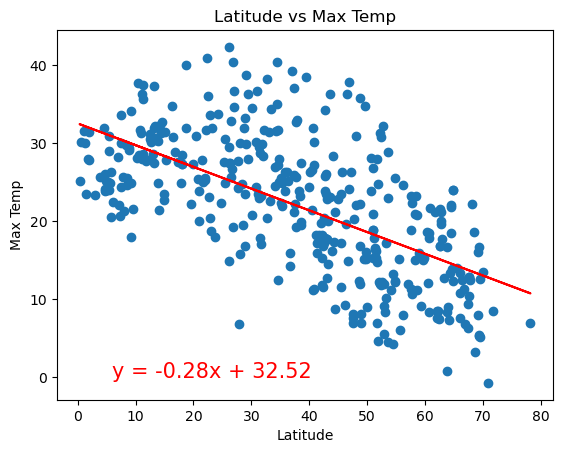

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.6720220238897325


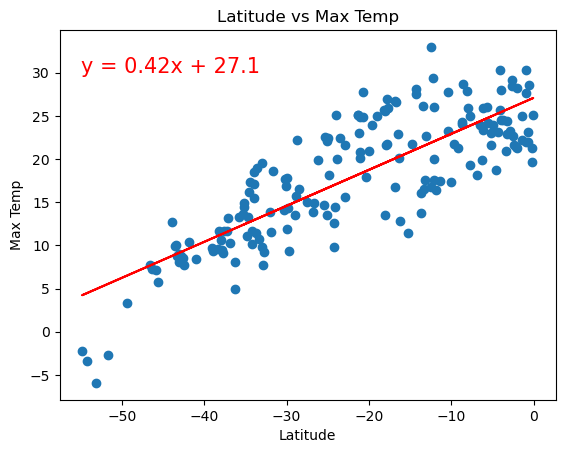

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.007659599322853922


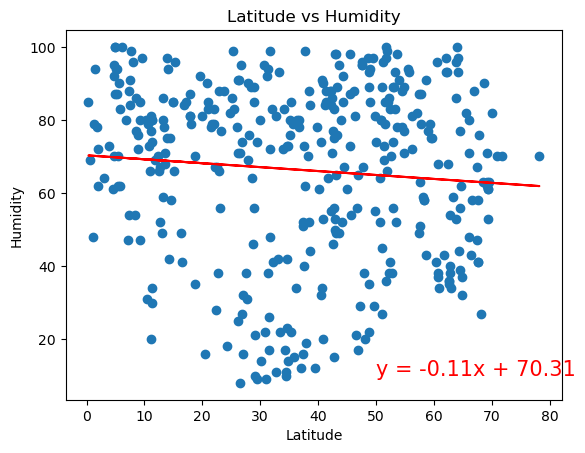

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.00014367159540169783


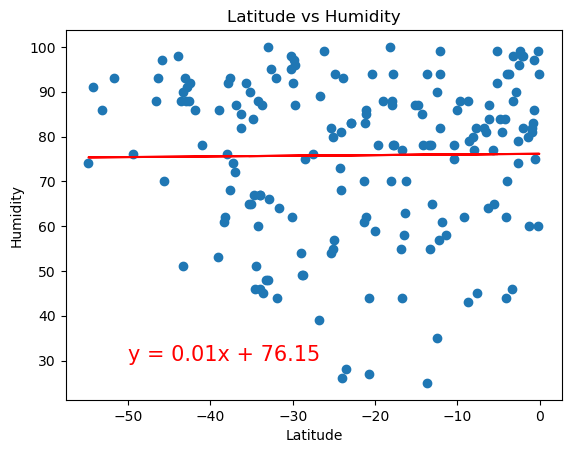

In [23]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.006456908379763574


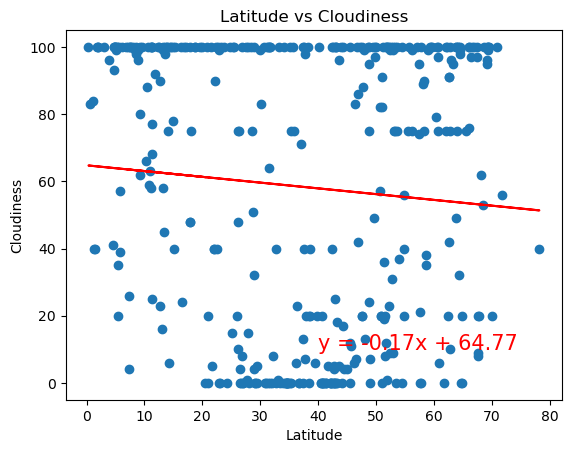

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.018616831531634456


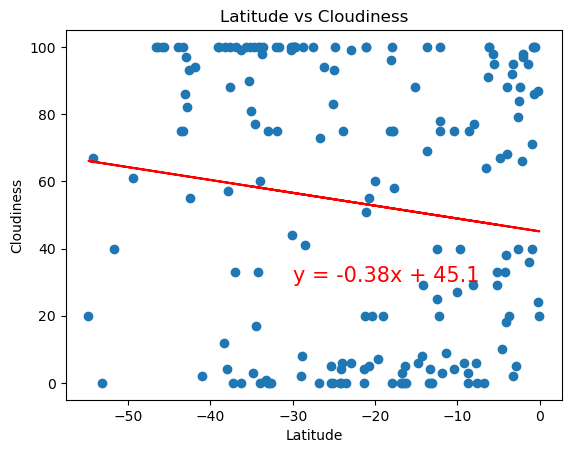

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0017236249523139959


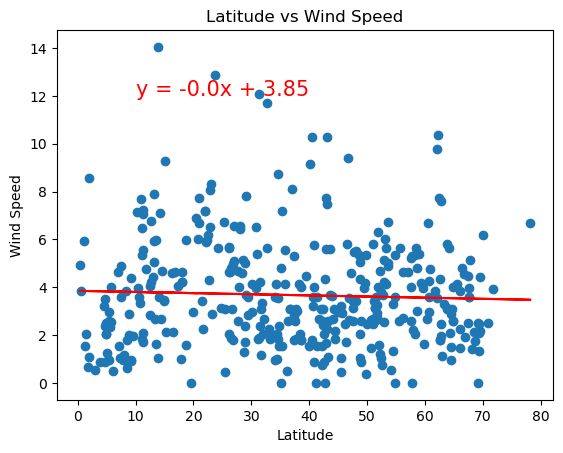

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.06495869418886388


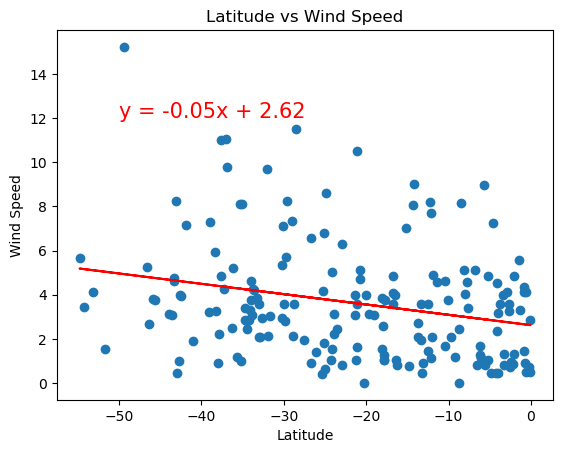

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE